In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import torch

import sys
sys.path.append('../')
from core import distributions
from notebooks import visutils as utils

In [4]:
!ls ../logs

banana_hmc.pt         german_ohmc.pt        icg_optmc90.pt
banana_ohmc.pt        german_ohmc_jitter.pt icg_rechmc.pt
banana_ohmc_jitter.pt german_optmc.pt       irt.out
banana_optmc.pt       german_optmc90.pt     irt_hmc.pt
banana_optmc90.pt     german_optmc99.pt     irt_ohmc.pt
banana_optmc99.pt     german_rechmc.pt      irt_optmc.pt
banana_rechmc.pt      icg_hmc.pt            irt_rechmc.pt
german.out            icg_ohmc.pt
german_hmc.pt         icg_optmc.pt


In [5]:
device = torch.device('cpu')
target = distributions.ICG(50, device)

In [6]:
grid = np.linspace(1000, 64000, 1000)
mean_hmc, std_hmc = utils.get_errors('../logs/icg_hmc.pt', target, 'HMC', grid)
mean_rechmc, std_rechmc = utils.get_errors('../logs/icg_rechmc.pt', target, 'recHMC', grid)
mean_ohmc, std_ohmc = utils.get_errors('../logs/icg_ohmc.pt', target, 'oHMC', grid)
mean_optmc, std_optmc = utils.get_errors_opt('../logs/icg_optmc.pt', target, 'optMC', grid)

HMC: ESS = 1.88e-01(3.96e-02); ESS/budget = 1.51e-06(6.14e-07);  budget = 64561.0
recHMC: ESS = 1.79e-01(4.83e-02); ESS/budget = 1.43e-06(7.37e-07);  budget = 65532.0
oHMC: ESS = 1.34e-01(4.72e-02); ESS/budget = 1.08e-06(7.30e-07);  budget = 64640.0
optMC: ESS = 2.54e-02(5.75e-03); ESS/budget = 2.04e-07(8.90e-08);  budget = 64641


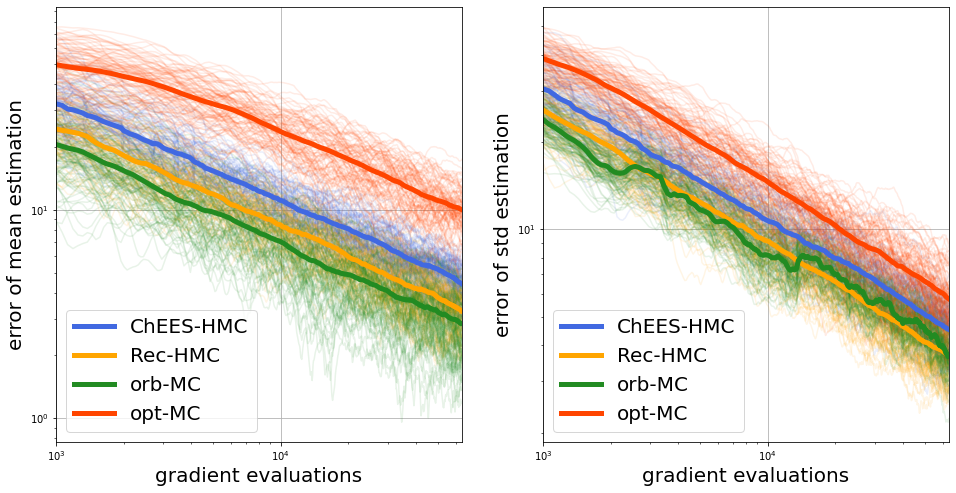

In [7]:
fs = 20
plt.figure(figsize(16,8))
plt.subplot(121)
plt.plot(grid, mean_hmc.T, c='royalblue', alpha=0.1)
plt.plot(grid, mean_rechmc.T, c='orange', alpha=0.1)
plt.plot(grid, mean_ohmc.T, c='forestgreen', alpha=0.1)
plt.plot(grid, mean_optmc.T, c='orangered', alpha=0.1)

plt.plot(grid, mean_hmc.mean(0), c='royalblue', lw=5, label='ChEES-HMC')
plt.plot(grid, mean_rechmc.mean(0), c='orange', lw=5, label='Rec-HMC')
plt.plot(grid, mean_ohmc.mean(0), c='forestgreen', lw=5, label='orb-MC')
plt.plot(grid, mean_optmc.mean(0), c='orangered', lw=5, label='opt-MC')
plt.xlabel('gradient evaluations', fontsize=fs)
plt.ylabel('error of mean estimation', fontsize=fs)
plt.legend(loc='lower left', fontsize=fs)
plt.xlim(grid.min(), grid.max())
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.subplot(122)
plt.plot(grid, std_hmc.T, c='royalblue', alpha=0.1)
plt.plot(grid, std_rechmc.T, c='orange', alpha=0.1)
plt.plot(grid, std_ohmc.T, c='forestgreen', alpha=0.1)
plt.plot(grid, std_optmc.T, c='orangered', alpha=0.1)
plt.plot(grid, std_hmc.mean(0), c='royalblue', lw=5, label='ChEES-HMC')
plt.plot(grid, std_rechmc.mean(0), c='orange', lw=5, label='Rec-HMC')
plt.plot(grid, std_ohmc.mean(0), c='forestgreen', lw=5, label='orb-MC')
plt.plot(grid, std_optmc.mean(0), c='orangered', lw=5, label='opt-MC')
plt.xlabel('gradient evaluations', fontsize=fs)
plt.ylabel('error of std estimation', fontsize=fs)
plt.legend(loc='lower left', fontsize=fs)
plt.xlim(grid.min(), grid.max())
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

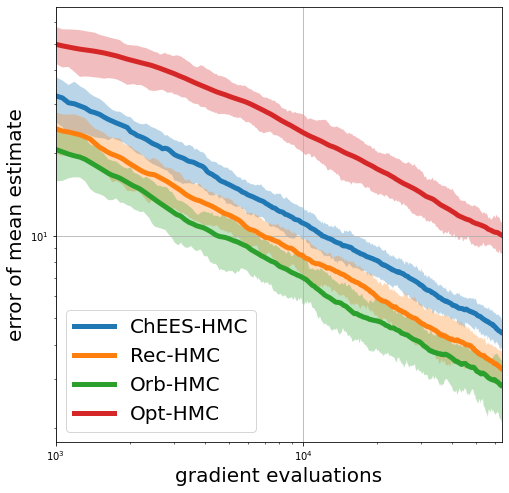

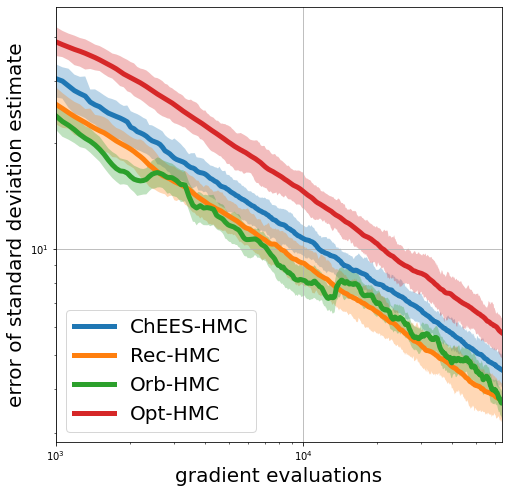

In [8]:
fs = 20
plt.figure(figsize(8,8))
utils.plot_errors(mean_hmc, grid, 'ChEES-HMC')
utils.plot_errors(mean_rechmc, grid, 'Rec-HMC')
utils.plot_errors(mean_ohmc, grid, 'Orb-HMC')
utils.plot_errors(mean_optmc, grid, 'Opt-HMC')
plt.xlabel('gradient evaluations', fontsize=fs)
plt.ylabel('error of mean estimate', fontsize=fs)
plt.legend(loc='lower left', fontsize=fs)
plt.xlim(grid.min(), grid.max())
plt.savefig('./pics/icg_mean.pdf', bbox_inches='tight')
plt.grid()
plt.show()

plt.figure(figsize(8,8))
utils.plot_errors(std_hmc, grid, 'ChEES-HMC')
utils.plot_errors(std_rechmc, grid, 'Rec-HMC')
utils.plot_errors(std_ohmc, grid, 'Orb-HMC')
utils.plot_errors(std_optmc, grid, 'Opt-HMC')
plt.xlabel('gradient evaluations', fontsize=fs)
plt.ylabel('error of standard deviation estimate', fontsize=fs)
plt.legend(loc='lower left', fontsize=fs)
plt.xlim(grid.min(), grid.max())
plt.savefig('./pics/icg_std.pdf', bbox_inches='tight')
plt.grid()
plt.show()